In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


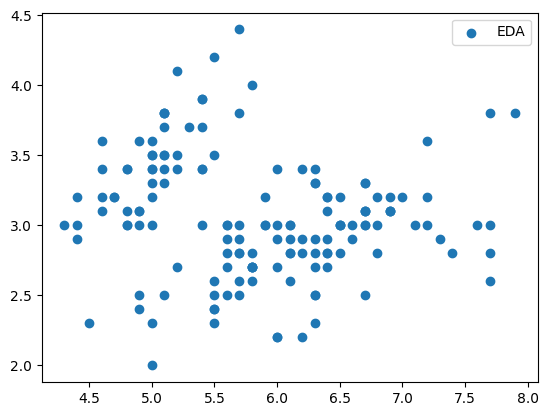

In [4]:
df.shape
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], label="EDA")
plt.legend()
df.describe()
print(df.corr())

In [5]:
#preprocessing data
y=df["petal length (cm)"].values.reshape(-1,1)
x=df["petal width (cm)"].values.reshape(-1,1)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [6]:
#train the model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

[1.07065637]
[[2.22883109]]


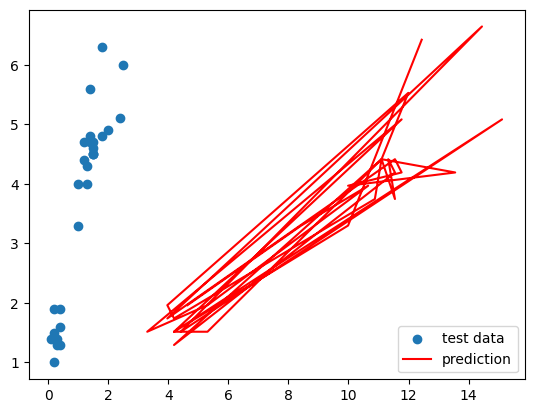

In [9]:
#prediction

y_pred = regressor.predict(x_test)
x_pred = regressor.predict(y_test)
plt.scatter(x_test, y_test, label="test data")
plt.plot(x_pred, y_pred, color='red', label="prediction")
plt.legend()

#evaluation

In [11]:
y_pred=regressor.predict(x_test)
df_pred=pd.DataFrame({'Actual': x_pred.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred.head())

      Actual  Predicted
0  12.437695   6.419851
1   9.985981   3.299487
2   4.191020   1.516423
3  15.112292   5.082552
4   4.413903   1.516423


In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Absolute Error:', mae)

print('Mean Squared Error:', mse)

print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 0.43811597140358816
Mean Squared Error: 0.3380690815510107
Root Mean Squared Error: 0.5814370830545732


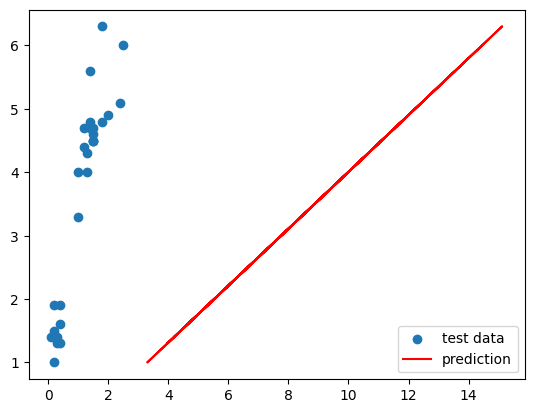

In [10]:
x_pred = regressor.predict(y_test)
plt.scatter(x_test, y_test, label="test data")
plt.plot(x_pred,y_test, color='red', label="prediction")
plt.legend()
